In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
import tensorflow as tf
import keras.backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from importlib import reload

# custom module for capstone 2
import cap2tools as c2t
reload(c2t)

<module 'cap2tools' from 'C:\\Users\\Nils\\Documents\\GitHub\\Springboard-Capstone-2-local-yelp\\cap2tools.py'>

In [2]:
# configure GPU memory usage by tensorflow
config = K.tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.80
K.tensorflow_backend.set_session(K.tf.Session(config=config))

In [3]:
# define paths to image directories
train_path = 'downsampled/train'
valid_path = 'downsampled/val'

# create image data generators to feed the model from image directories
train_batches, valid_batches = c2t.build_datagens(train_path, valid_path, augment=False)

Found 5480 images belonging to 5 classes.
Found 525 images belonging to 5 classes.


In [4]:
width = 500 # 500 nodes in the FC layers
replicates = 3 #run each condition in triplicate
n_epochs = 10
histories = dict()

# baseline ImageNet weights
condition = 'imagenet_baseline'
histories[condition] = c2t.run_in_replicate(width, condition, train_batches, valid_batches, 
                                            replicates=replicates, n_epochs=n_epochs, new_weights=False, 
                                            trainable=False)

# trainable ImageNet weights
condition = 'imagenet_trainable'
histories[condition] = c2t.run_in_replicate(width, condition, train_batches, valid_batches, 
                                            replicates=replicates, n_epochs=n_epochs, new_weights=False, 
                                            trainable=True)

# new weights
condition = 'new_weights'
histories[condition] = c2t.run_in_replicate(width, condition, train_batches, valid_batches, 
                                            replicates=replicates, n_epochs=n_epochs, new_weights=True, 
                                            trainable=True)

2018-09-13 22:19:53 - Started training models/vgg16_imagenet_baseline_1
2018-09-13 22:29:55 - Started training models/vgg16_imagenet_baseline_2
2018-09-13 22:39:48 - Started training models/vgg16_imagenet_baseline_3
2018-09-13 22:49:50 - Started training models/vgg16_imagenet_trainable_1
2018-09-13 23:14:41 - Started training models/vgg16_imagenet_trainable_2
2018-09-13 23:39:32 - Started training models/vgg16_imagenet_trainable_3
2018-09-14 00:04:31 - Started training models/vgg16_new_weights_1
2018-09-14 00:28:31 - Started training models/vgg16_new_weights_2
2018-09-14 00:52:59 - Started training models/vgg16_new_weights_3


## Image Augmentation
___


In [10]:
# create new data generators with image augmentation
train_batches, valid_batches = c2t.build_datagens(train_path, valid_path, augment=True)

# trainable ImageNet weights with image augmentation
condition = 'imagenet_trainable_augment'
histories[condition] = c2t.run_in_replicate(width, condition, train_batches, valid_batches, 
                                            replicates=replicates, n_epochs=n_epochs, new_weights=False, 
                                            trainable=True)

Found 5480 images belonging to 5 classes.
Found 525 images belonging to 5 classes.
2018-09-14 02:37:02 - Started training models/vgg16_imagenet_trainable_augment_1
2018-09-14 03:01:12 - Started training models/vgg16_imagenet_trainable_augment_2
2018-09-14 03:25:24 - Started training models/vgg16_imagenet_trainable_augment_3


In [12]:
# save training history
hist_df = pd.DataFrame(histories).transpose()
hist_df.to_json('VGG16_pretraining_comparison_history.json')

In [20]:
# evaluate trained models on validation dataset
model_paths = {'ImageNet baseline 1': 'models/vgg16_imagenet_baseline_1.h5', 
               'ImageNet baseline 2': 'models/vgg16_imagenet_baseline_2.h5', 
               'ImageNet baseline 3': 'models/vgg16_imagenet_baseline_3.h5', 
               'ImageNet trainable 1': 'models/vgg16_imagenet_trainable_1.h5', 
               'ImageNet trainable 2': 'models/vgg16_imagenet_trainable_2.h5', 
               'ImageNet trainable 3': 'models/vgg16_imagenet_trainable_3.h5',
               'New weights 1': 'models/vgg16_new_weights_1.h5', 
               'New weights 2': 'models/vgg16_new_weights_2.h5', 
               'New weights 3': 'models/vgg16_new_weights_3.h5', 
               'ImageNet augmented 1': 'models/vgg16_imagenet_trainable_augment_1.h5', 
               'ImageNet augmented 2': 'models/vgg16_imagenet_trainable_augment_2.h5', 
               'ImageNet augmented 3': 'models/vgg16_imagenet_trainable_augment_3.h5'}

model_metrics = c2t.eval_models(model_paths, valid_path)

Building image generator...
Found 525 images belonging to 5 classes.
Loading models/vgg16_imagenet_baseline_1.h5
Evaluating models/vgg16_imagenet_baseline_1.h5
Loading models/vgg16_imagenet_baseline_2.h5
Evaluating models/vgg16_imagenet_baseline_2.h5
Loading models/vgg16_imagenet_baseline_3.h5
Evaluating models/vgg16_imagenet_baseline_3.h5
Loading models/vgg16_imagenet_trainable_1.h5
Evaluating models/vgg16_imagenet_trainable_1.h5
Loading models/vgg16_imagenet_trainable_2.h5
Evaluating models/vgg16_imagenet_trainable_2.h5
Loading models/vgg16_imagenet_trainable_3.h5
Evaluating models/vgg16_imagenet_trainable_3.h5
Loading models/vgg16_new_weights_1.h5
Evaluating models/vgg16_new_weights_1.h5
Loading models/vgg16_new_weights_2.h5
Evaluating models/vgg16_new_weights_2.h5
Loading models/vgg16_new_weights_3.h5
Evaluating models/vgg16_new_weights_3.h5
Loading models/vgg16_imagenet_trainable_augment_1.h5
Evaluating models/vgg16_imagenet_trainable_augment_1.h5
Loading models/vgg16_imagenet_tra

In [29]:
# create table of evaluation results
table = c2t.eval_table(model_metrics, 'Weights', decimals=3)
table

,acc,loss,mpcr
Weights,,,
ImageNet baseline 1,0.876,0.907,0.876
ImageNet baseline 2,0.870,1.044,0.870
ImageNet baseline 3,0.855,1.001,0.855
ImageNet trainable 1,0.880,0.323,0.880
ImageNet trainable 2,0.878,0.323,0.878
ImageNet trainable 3,0.872,0.357,0.872
New weights 1,0.730,0.743,0.730
New weights 2,0.716,0.755,0.716
New weights 3,0.703,0.814,0.703


In [31]:
c2t.print_eval(model_metrics['ImageNet trainable 1'])

accuracy:  0.8800000000283832
loss:  0.323073485939697
pcr:  [0.87619048 0.92380952 0.85714286 0.95238095 0.79047619]
mean pcr:  0.8799999999999999
confusion matrix: 


[[92, 6, 6, 1, 0],
 [6, 97, 1, 1, 0],
 [5, 2, 90, 0, 8],
 [3, 0, 0, 100, 2],
 [1, 0, 21, 0, 83]]

In [32]:
c2t.print_eval(model_metrics['ImageNet augmented 2'])

accuracy:  0.8761904764175416
loss:  0.32528439417348376
pcr:  [0.84761905 0.91428571 0.78095238 0.96190476 0.87619048]
mean pcr:  0.8761904761904763
confusion matrix: 


[[89, 4, 6, 4, 2],
 [8, 96, 0, 1, 0],
 [5, 4, 82, 1, 13],
 [2, 0, 1, 101, 1],
 [0, 0, 13, 0, 92]]

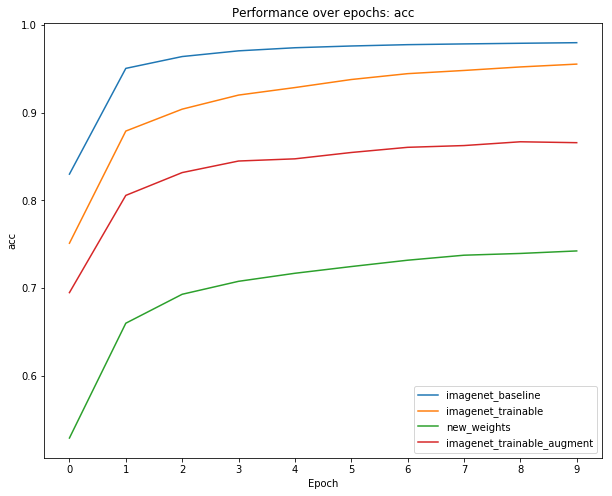

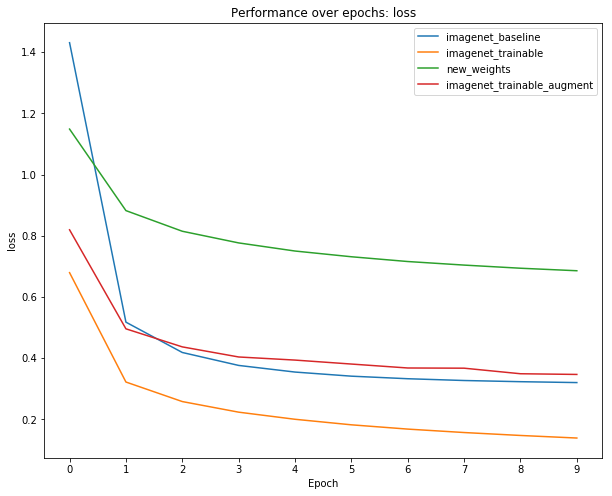

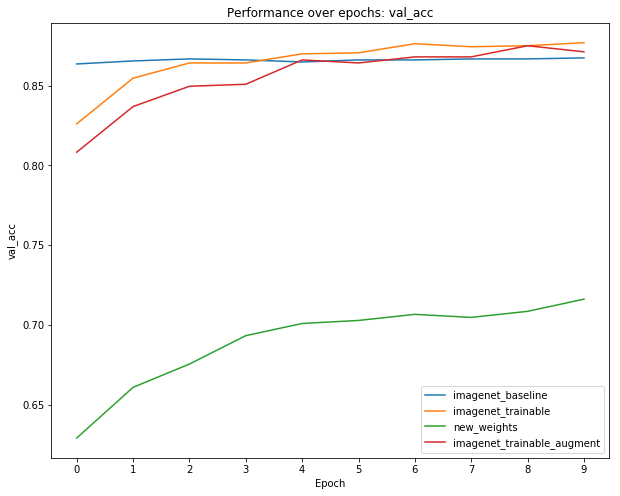

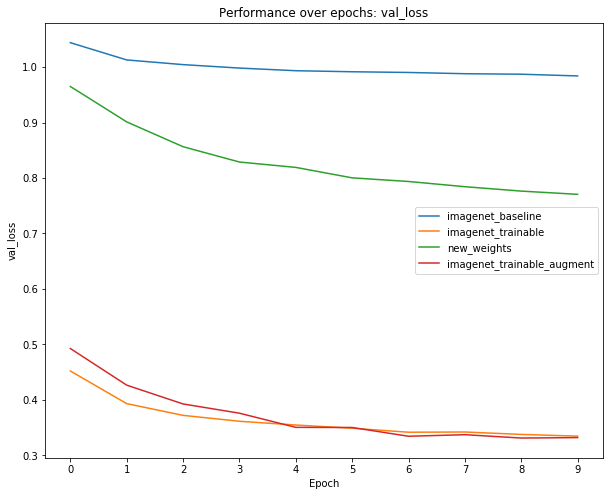

In [13]:
# plot model comparison
c2t.plot_metric('acc', hist_df)
c2t.plot_metric('loss', hist_df)
c2t.plot_metric('val_acc', hist_df)
c2t.plot_metric('val_loss', hist_df)